![example](images/director_shot.jpeg)

# Project Title

**Authors:** Susan Nduta Kanyora.
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import standard packages
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [4]:
#To explore the data
with zipfile .ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip,path='ZippedData')

In [5]:
#Connecting the database
conn =sqlite3.connect('ZippedData/im.db')

In [6]:
! ls zippedData


'ls' is not recognized as an internal or external command,
operable program or batch file.


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [7]:
# Here you run your code to clean the data
pd.read_sql("""
SELECT *
FROM sqlite_schema
WHERE type = 'table'
""" , conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [8]:
movies_ratings = None
movies_ratings = pd.read_sql("""
SELECT *
FROM movie_basics
LEFT JOIN movie_ratings
    USING(movie_id)
""" , conn)

movies_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [9]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [10]:
#Inspecting for missing values
movies_ratings.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [11]:
#Eliminating titles with no votes or ratings
movies_ratings.dropna(subset=['numvotes'], inplace=True)


In [12]:
#Checking if the missing values were eliminated
print(movies_ratings['numvotes'].isna().sum())


0


In [13]:
#Eliminating titles with no genre listed
movies_ratings.dropna(subset=['genres'], inplace=True)

In [14]:
#Checking for duplicated values
movies_ratings.duplicated().sum()

0

In [15]:
movies_ratings.duplicated(subset='original_title').sum()

2707

In [16]:
duplicate_movies = movies_ratings[movies_ratings.duplicated(subset=['original_title', 'runtime_minutes', 'start_year'], keep=False)]
print(duplicate_movies)


          movie_id                    primary_title  \
2632    tt10272966  Raggarjävlar (Swedish Greasers)   
2658    tt10275936  Raggarjävlar (Swedish Greasers)   
8271     tt1494821                         The Gift   
11830    tt1644694                         The Gift   
12125    tt1651148                     The Last Act   
12261    tt1655442                       The Artist   
12599    tt1666345                          Transit   
12984    tt1674217                          Transit   
15931    tt1753521                      Blood Money   
16400    tt1758610                    Unconditional   
16923    tt1773499                           Inside   
19111    tt1825978                       The Artist   
23887    tt1967651               Unconditional Love   
24139    tt1977822                           Inside   
33380    tt2246595                      Blood Money   
33608    tt2251541                       The Summit   
37698    tt2363471                       The Summit   
43399    t

In [17]:
#Sorting the dataset by vote count
movies_ratings_sorted = movies_ratings.sort_values(by='numvotes', ascending=False, inplace=True)
print(movies_ratings_sorted)

None


In [18]:
#Eliminating the duplicates
movies_ratings.drop_duplicates(subset=['original_title', 'runtime_minutes', 'start_year'], keep='first')


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
...,...,...,...,...,...,...,...,...
58705,tt3417906,The Nose,The Nose,2013,52.0,Documentary,8.6,5.0
93803,tt5465608,Extramaterial,Extramaterial,2016,59.0,Documentary,6.6,5.0
81438,tt4681636,Free Spaces,Free Spaces,2015,60.0,Documentary,9.0,5.0
48978,tt2915328,Abou Al Oureef,Abou Al Oureef,2014,96.0,Comedy,5.2,5.0


In [19]:
movies_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0
356,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0


In [20]:
#Creating a new dataframe
clean_genres = movies_ratings.copy()

In [21]:
#Chenging from string to a list 
clean_genres['genres'] = clean_genres['genres'].str.split(',')
clean_genres.head(6)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"[Action, Thriller]",8.4,1387769.0
311,tt0816692,Interstellar,Interstellar,2014,169.0,"[Adventure, Drama, Sci-Fi]",8.6,1299334.0
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"[Drama, Western]",8.4,1211405.0
356,tt0848228,The Avengers,The Avengers,2012,143.0,"[Action, Adventure, Sci-Fi]",8.1,1183655.0
545,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"[Biography, Crime, Drama]",8.2,1035358.0


In [22]:
#
genres_all = set()
genres_column = clean_genres['genres']

for glist in genres_column:
    for g in glist:
        genres_all.add(g)
    
print(genres_all)    

{'Mystery', 'Thriller', 'Reality-TV', 'Crime', 'Action', 'Sci-Fi', 'Adult', 'Horror', 'Adventure', 'Fantasy', 'Western', 'Sport', 'Drama', 'Family', 'War', 'Musical', 'Romance', 'Game-Show', 'Documentary', 'Biography', 'News', 'Animation', 'Music', 'Comedy', 'Short', 'History'}


In [23]:
expl_clean_genres = clean_genres.explode('genres')
expl_clean_genres.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7066,tt1375666,Inception,Inception,2010,148.0,Action,8.8,1841066.0
7066,tt1375666,Inception,Inception,2010,148.0,Adventure,8.8,1841066.0
7066,tt1375666,Inception,Inception,2010,148.0,Sci-Fi,8.8,1841066.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,8.4,1387769.0
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Thriller,8.4,1387769.0


In [24]:
expl_clean_genres['genres'].value_counts()

Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: genres, dtype: int64

In [25]:
genres_of_interest = ['genre']

# Create a boolean mask for the desired genres
genre_mask = clean_genres['genres'].apply(lambda x: any(item for item in genres_of_interest if item in x))

# Use the boolean mask to filter the DataFrame and extract the movie IDs for each genre of interest
genre_movies = {}
for genre in genres_of_interest:
    genre_movies[genre] = clean_genres.loc[genre_mask & (clean_genres['genres'].apply(lambda x: genre in x))]

# Print the resulting movie ID lists for each genre of interest
for genre in genres_of_interest:
    print(genre, 'movies:', genre_movies[genre])


genre movies: Empty DataFrame
Columns: [movie_id, primary_title, original_title, start_year, runtime_minutes, genres, averagerating, numvotes]
Index: []


In [26]:
clean_genres['genres'].value_counts()

[Drama]                           11612
[Documentary]                     10313
[Comedy]                           5613
[Horror]                           2692
[Comedy, Drama]                    2617
                                  ...  
[Horror, Music]                       1
[Biography, Crime]                    1
[Comedy, Documentary, Western]        1
[Comedy, History, Mystery]            1
[Comedy, Documentary, Fantasy]        1
Name: genres, Length: 923, dtype: int64

In [27]:
movies_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73052.000000,65720.000000,73052.000000,7.305200e+04
mean,2014.281430,94.732273,6.330930,3.562173e+03
std,2.615288,209.377017,1.474699,3.045804e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,5.000000e+01
75%,2017.000000,104.000000,7.400000,2.890000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [36]:
print(movies_ratings.columns)

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


In [38]:
# Calculate the average rating by genre
avg_ratings_by_genres = movies_ratings.groupby('genres')['averagerating'].mean()

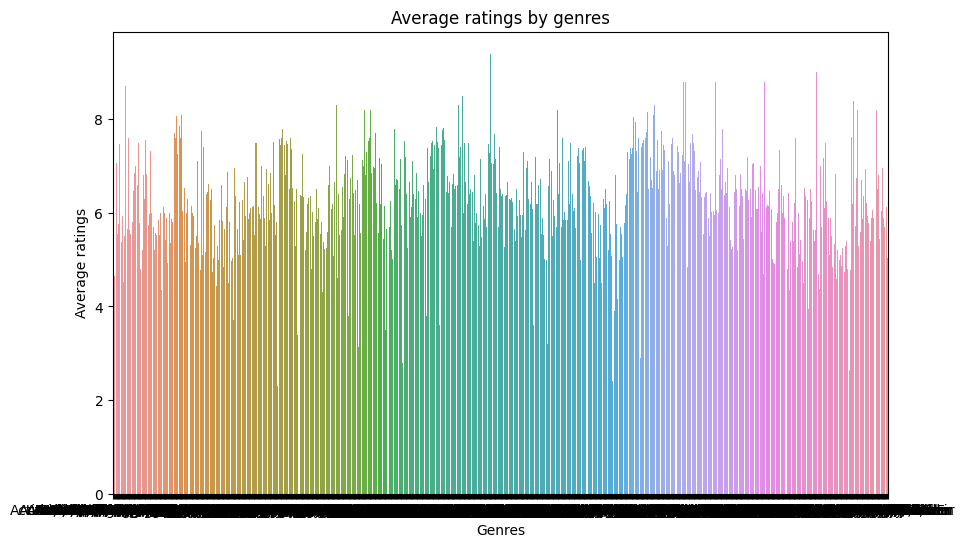

In [40]:
#Create a bar chart of average ratings by genre
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ratings_by_genres.index, y=avg_ratings_by_genres.values)
plt.xlabel('Genres')
plt.ylabel('Average ratings')
plt.title('Average ratings by genres')
plt.show()


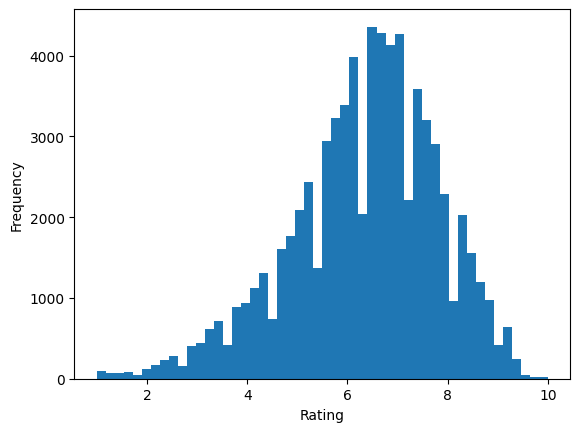

In [41]:
import matplotlib.pyplot as plt

# Create a histogram of movie ratings
plt.hist(movies_ratings['averagerating'], bins=50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [42]:
# Sort movies by rating and select top 10
top_movies = movies_ratings.sort_values('averagerating', ascending=False).head(10)
print(top_movies)


          movie_id                                    primary_title  \
4016    tt10378660        The Dark Knight: The Ballad of the N Word   
136750   tt8730716                    Pick It Up! - Ska in the '90s   
92455    tt5344358                                    All Around Us   
93040    tt5390098              The Paternal Bond: Barbary Macaques   
44279    tt2632430                            Hercule contre Hermès   
71954    tt4109192                            I Was Born Yesterday!   
117359   tt6991826  A Dedicated Life: Phoebe Brand Beyond the Group   
16767    tt1770682                             Freeing Bernie Baran   
1857    tt10176328   Exteriores: Mulheres Brasileiras na Diplomacia   
144763   tt9715646                                         Renegade   

                                           original_title  start_year  \
4016            The Dark Knight: The Ballad of the N Word        2018   
136750                      Pick It Up! - Ska in the '90s        2019   

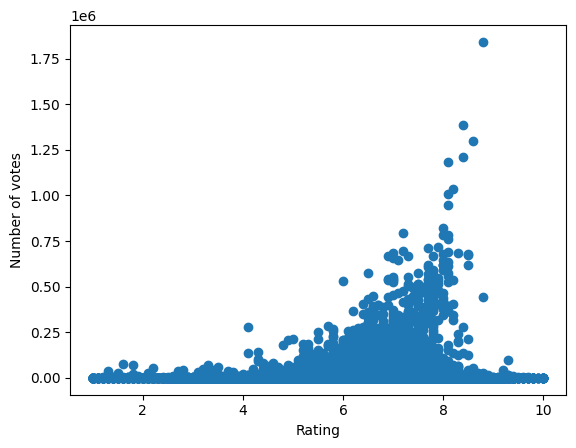

In [43]:
# Create a scatter plot of movie rating vs. number of votes
plt.scatter(movies_ratings['averagerating'], movies_ratings['numvotes'])
plt.xlabel('Rating')
plt.ylabel('Number of votes')
plt.show()


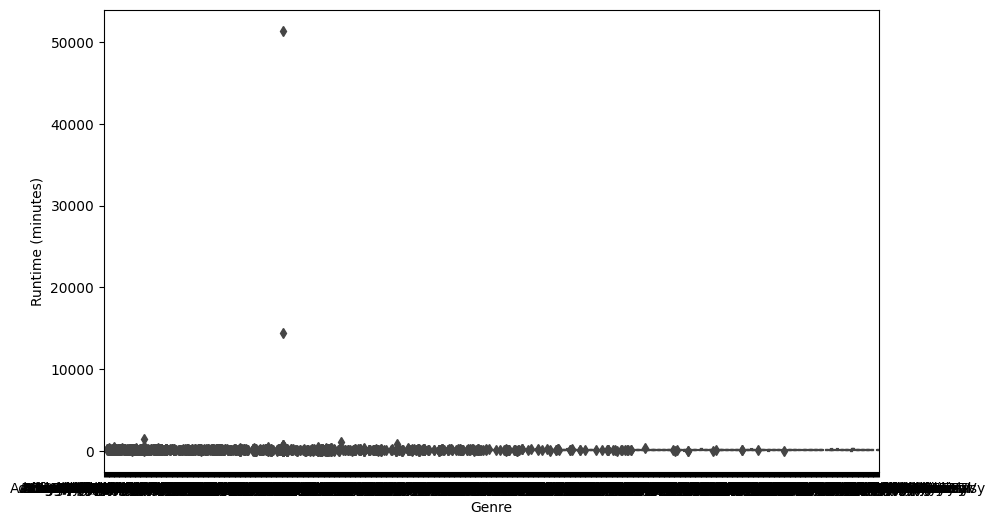

In [44]:
import seaborn as sns

# Create a boxplot of movie runtimes by genre
plt.figure(figsize=(10, 6))
sns.boxplot(x='genres', y='runtime_minutes', data=movies_ratings)
plt.xlabel('Genre')
plt.ylabel('Runtime (minutes)')
plt.show()


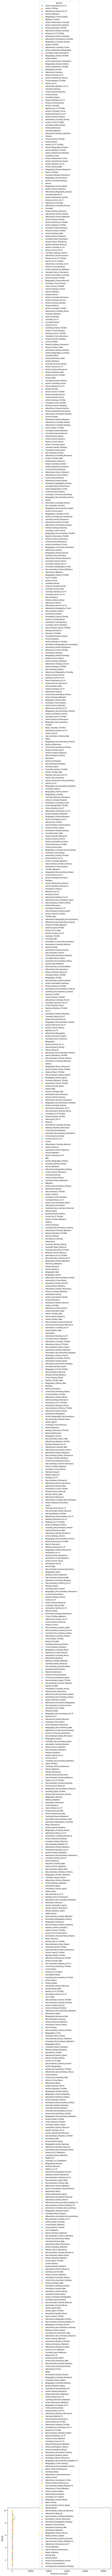

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot of movie ratings vs. runtime with hue based on genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_ratings, x='runtime_minutes', y='averagerating', hue='genres', palette='Set2')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***